In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [92]:
path = "master.csv"
df = pd.read_csv( path, decimal='.',error_bad_lines=False)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdpforyear,gdppercapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [93]:
df_copy = df.copy()


# W/PROBLEMS

{`HDI for year `, `gdp_per_capita`, `generation`, `sex`, `age`, `country`}


In [94]:
(df_copy["HDI for year"].value_counts().iloc[0]/df_copy.shape[0])*100


0.301941049604601

In [95]:
df_copy["HDI for year"].value_counts()

0.888    84
0.772    84
0.713    84
0.830    72
0.793    72
         ..
0.614    12
0.728    12
0.522    12
0.879    12
0.924    12
Name: HDI for year, Length: 305, dtype: int64

In [96]:
hdi= df_copy[df_copy["HDI for year"].isin(list(df_copy["HDI for year"].value_counts().astype(str).head(305).index))]
hdi.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdpforyear,gdppercapita,generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,2424499009,835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,2424499009,835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,2424499009,835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,2424499009,835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,2424499009,835,Generation X


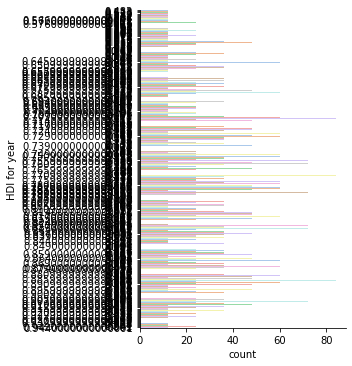

In [97]:
sns.catplot(y="HDI for year", kind="count", palette="pastel", data=hdi);

In [98]:
df_copy.drop(labels=["HDI for year"], axis=1, inplace=True)


`HDI for year`
```python
Número de valores únicos:  305
Valores únicos:  [  nan 0.619 0.656 0.695 0.722 0.781 0.783 0.694 0.705 0.731 0.762 0.775
 0.811 0.818 0.831 0.833 0.836 0.632 0.605 0.648 0.721 0.723 0.728 0.733
 0.865 0.882 0.898 0.927 0.93  0.932 0.933 0.935 0.764 0.794 0.815 0.853
 0.879 0.881 0.884 0.885 0.609 0.64  0.778 0.78  0.774 0.786 0.727 0.816
 0.819 0.817 0.821 0.824 0.7   0.716 0.753 0.765 0.793 0.785 0.683 0.796
 0.798 0.806 0.851 0.874 0.866 0.883 0.886 0.889 0.888 0.89  0.644 0.664
 0.701 0.71  0.711 0.715 0.724 0.576 0.608 0.702 0.737 0.742 0.746 0.752
 0.755 0.686 0.696 0.713 0.749 0.773 0.779 0.782 0.827 0.849 0.861 0.867
 0.892 0.903 0.909 0.91  0.912 0.654 0.699 0.788 0.814 0.83  0.832 0.573
 0.596 0.629 0.679 0.706 0.718 0.72  0.623 0.652 0.682 0.704 0.75  0.756
 0.761 0.766 0.807 0.653 0.685 0.73  0.776 0.772 0.768 0.769 0.8   0.848
 0.852 0.85  0.847 0.863 0.868 0.87  0.862 0.902 0.908 0.92  0.921 0.923
 0.631 0.645 0.665 0.674 0.698 0.717 0.732 0.522 0.566 0.603 0.638 0.658
 0.662 0.666 0.719 0.838 0.855 0.859 0.857 0.869 0.878 0.741 0.825 0.887
 0.672 0.735 0.74  0.747 0.754 0.801 0.906 0.911 0.915 0.916 0.759 0.799
 0.864 0.739 0.483 0.513 0.552 0.611 0.617 0.624 0.626 0.627 0.542 0.581
 0.618 0.63  0.634 0.802 0.823 0.828 0.826 0.896 0.897 0.899 0.77  0.803
 0.895 0.893 0.894 0.738 0.829 0.856 0.873 0.872 0.65  0.671 0.729 0.791
 0.891 0.69  0.804 0.795 0.809 0.812 0.615 0.562 0.593 0.614 0.639 0.655
 0.67  0.813 0.837 0.839 0.805 0.88  0.822 0.575 0.647 0.777 0.748 0.877
 0.919 0.922 0.82  0.905 0.907 0.625 0.628 0.917 0.931 0.94  0.941 0.942
 0.944 0.714 0.564 0.579 0.604 0.646 0.668 0.669 0.677 0.84  0.843 0.676
 0.844 0.841 0.703 0.751 0.691 0.697 0.757 0.771 0.736 0.743 0.767 0.763
 0.876 0.613 0.643 0.651 0.659 0.663 0.725 0.845 0.597 0.692 0.707 0.709
 0.901 0.904 0.846 0.924 0.925 0.928 0.539 0.572 0.684 0.726 0.673 0.688
 0.913 0.667 0.79  0.594 0.661 0.675]
Conteo de valores 0.888    84
0.772    84
0.713    84
0.830    72
0.793    72
         ..
0.614    12
0.728    12
0.522    12
0.879    12
0.924    12
```
Name: HDI for year, Length: 305, dtype: int64




In [99]:
PAIS = df_copy[df_copy.country.isin(list(df_copy.country.value_counts().astype(str).head(101).index))]
PAIS.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdpforyear,gdppercapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers


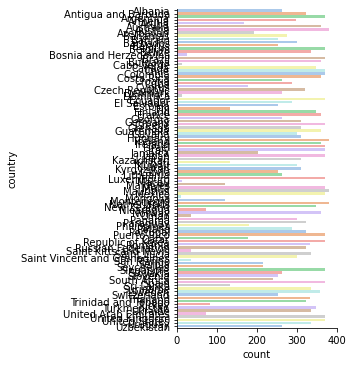

In [100]:
sns.catplot(y="country", kind="count", palette="pastel", data=PAIS);


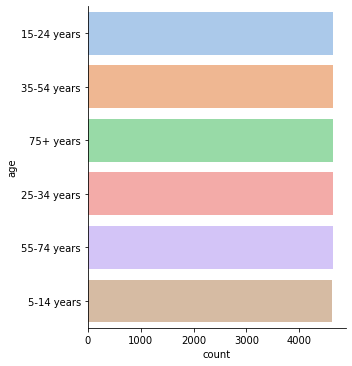

In [101]:
sns.catplot(y="age", kind="count", palette="pastel", data=df_copy);

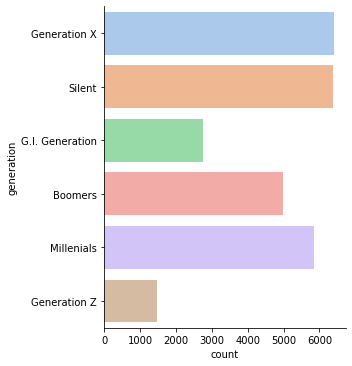

In [102]:
sns.catplot(y="generation", kind="count", palette="pastel", data=df_copy);

In [103]:

anio= df_copy[df_copy.year.isin(list(df_copy.year.value_counts().astype(str).head(32).index))]
anio.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdpforyear,gdppercapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers


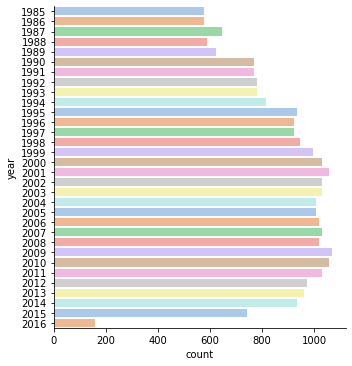

In [104]:

sns.catplot(y="year", kind="count", palette="pastel", data=anio);

In [105]:
le = LabelEncoder() 
df_copy['country']= le.fit_transform(df_copy['country'])

In [106]:
df_copy.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdpforyear,gdppercapita,generation
0,0,1987,male,15-24 years,21,312900,6.71,Albania1987,2156624900,796,Generation X
1,0,1987,male,35-54 years,16,308000,5.19,Albania1987,2156624900,796,Silent
2,0,1987,female,15-24 years,14,289700,4.83,Albania1987,2156624900,796,Generation X
3,0,1987,male,75+ years,1,21800,4.59,Albania1987,2156624900,796,G.I. Generation
4,0,1987,male,25-34 years,9,274300,3.28,Albania1987,2156624900,796,Boomers


In [107]:
df_copy['sex']= le.fit_transform(df_copy['sex'])

In [108]:
df_copy['age']= le.fit_transform(df_copy['age'])
df_copy['generation']= le.fit_transform(df_copy['generation'])

In [109]:
df_copy.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdpforyear,gdppercapita,generation
0,0,1987,1,0,21,312900,6.71,Albania1987,2156624900,796,2
1,0,1987,1,2,16,308000,5.19,Albania1987,2156624900,796,5
2,0,1987,0,0,14,289700,4.83,Albania1987,2156624900,796,2
3,0,1987,1,5,1,21800,4.59,Albania1987,2156624900,796,1
4,0,1987,1,1,9,274300,3.28,Albania1987,2156624900,796,0


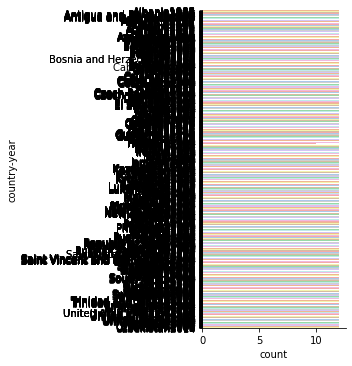

In [110]:
sns.catplot(y="country-year", kind="count", palette="pastel", data=df_copy);

In [111]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  int64  
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  int64  
 3   age                27820 non-null  int64  
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   gdpforyear         27820 non-null  int64  
 9   gdppercapita       27820 non-null  int64  
 10  generation         27820 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 2.3+ MB


In [112]:
df_copy.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdpforyear,gdppercapita,generation
0,0,1987,1,0,21,312900,6.71,Albania1987,2156624900,796,2
1,0,1987,1,2,16,308000,5.19,Albania1987,2156624900,796,5
2,0,1987,0,0,14,289700,4.83,Albania1987,2156624900,796,2
3,0,1987,1,5,1,21800,4.59,Albania1987,2156624900,796,1
4,0,1987,1,1,9,274300,3.28,Albania1987,2156624900,796,0


In [113]:
df_copy.drop(labels=["country-year"], axis=1, inplace=True)


In [114]:
df_copy.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdpforyear,gdppercapita,generation
0,0,1987,1,0,21,312900,6.71,2156624900,796,2
1,0,1987,1,2,16,308000,5.19,2156624900,796,5
2,0,1987,0,0,14,289700,4.83,2156624900,796,2
3,0,1987,1,5,1,21800,4.59,2156624900,796,1
4,0,1987,1,1,9,274300,3.28,2156624900,796,0


In [115]:

gdp= df_copy[df_copy.gdpforyear.isin(list(df_copy.gdpforyear.value_counts().astype(int).head(27820).index))]

In [119]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  int64  
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  int64  
 3   age                27820 non-null  int64  
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   gdpforyear         27820 non-null  int64  
 8   gdppercapita       27820 non-null  int64  
 9   generation         27820 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 2.1 MB


In [120]:
df_copy.to_csv("CLEAN_P.csv", index=False)